In [ ]:
Adınız: Gökhan
Soyadınız:YAPICI
Numaranız:211279006
GitHub Repo Bağlantısı: https://github.com/gkhan5252/Araba_Fiyat-_Tahmin_Uygulamas-

In [9]:
# =========================================================
# 1. GEREKLİ KÜTÜPHANELER
# =========================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import statsmodels.api as sm
import joblib


# =========================================================
# 2. DATASET YÜKLEME
# =========================================================
df = pd.read_csv("car_details.csv")

print("📌 İlk 5 Satır:")
print(df.head())

print("\n📌 NaN Kontrolü:")
print(df.isnull().sum())


# =========================================================
# 3. EKSİK VERİ TEMİZLEME
# =========================================================
df = df.dropna()
print("\n📌 NaN temizlendikten sonra şekil:", df.shape)


# =========================================================
# 4. NAME → BRAND ÇIKARMA (FEATURE ENGINEERING)
# =========================================================
# name sütunundan markayı alıyoruz (ilk kelime)
df["brand"] = df["name"].apply(lambda x: x.split()[0])

# En çok geçen 5 markayı tut, diğerlerini "Other" yap
top_brands = df["brand"].value_counts().nlargest(5).index
df["brand"] = df["brand"].apply(lambda x: x if x in top_brands else "Other")


# =========================================================
# 5. KATEGORİK VERİLERİ SAYISALA ÇEVİRME
# =========================================================
fuel_map = {
    "Petrol": 0,
    "Diesel": 1,
    "CNG": 2,
    "LPG": 3,
    "Electric": 4
}

seller_map = {
    "Individual": 0,
    "Dealer": 1,
    "Trustmark Dealer": 2
}

trans_map = {
    "Manual": 0,
    "Automatic": 1
}

owner_map = {
    "First Owner": 0,
    "Second Owner": 1,
    "Third Owner": 2,
    "Fourth & Above Owner": 3,
    "Test Drive Car": 4
}

df["fuel"] = df["fuel"].map(fuel_map)
df["seller_type"] = df["seller_type"].map(seller_map)
df["transmission"] = df["transmission"].map(trans_map)
df["owner"] = df["owner"].map(owner_map)


# =========================================================
# 6. BRAND → ONE-HOT ENCODING
# =========================================================
df = pd.get_dummies(df, columns=["brand"], drop_first=True)


# =========================================================
# 7. FEATURE VE TARGET SEÇİMİ (≤ 10 ÖZELLİK)
# =========================================================
# =========================================================
# 7. FEATURE VE TARGET SEÇİMİ (≤ 10 ÖZELLİK)
# =========================================================
X = df[
    [
        "year",
        "km_driven",
        "fuel",
        "seller_type",
        "transmission",
        "brand_Hyundai",
        "brand_Maruti",
        "brand_Mahindra",
        "brand_Tata",
        "brand_Other"
    ]
]

y = df["selling_price"]

# 🔧 statsmodels uyumu için
X = X.astype(float)
y = y.astype(float)

print("\n📌 X ve y şekilleri:", X.shape, y.shape)


# =========================================================
# 8. BACKWARD ELIMINATION (P-VALUE ANALİZİ)
# =========================================================
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

print("\n📌 Backward Elimination Sonuçları:")
print(model_sm.summary())


# =========================================================
# 9. TRAIN / TEST SPLIT
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n📌 Train/Test Şekilleri:")
print(X_train.shape, X_test.shape)


# =========================================================
# 10. VERİ ÖLÇEKLEME (STANDARD SCALER)
# =========================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# =========================================================
# 11. ÇOKLU DOĞRUSAL REGRESYON MODELİ
# =========================================================
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("\n📌 Model eğitildi")


# =========================================================
# 12. MODEL DEĞERLENDİRME
# =========================================================
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n📊 MODEL METRİKLERİ")
print("R² Score :", r2)
print("MAE      :", mae)
print("MSE      :", mse)


# =========================================================
# 13. MODEL VE SCALER KAYDETME
# =========================================================
joblib.dump(model, "car_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\n✅ car_price_model.pkl ve scaler.pkl kaydedildi")
print("🚀 Flask uygulaması için hazır!")


📌 İlk 5 Satır:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

📌 NaN Kontrolü:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

📌 NaN temizlendikten sonra şekil: (4340, 8)

📌 X ve y şekilleri: (4340, 10) (4340,)

📌 Backward Elimination Sonuçları

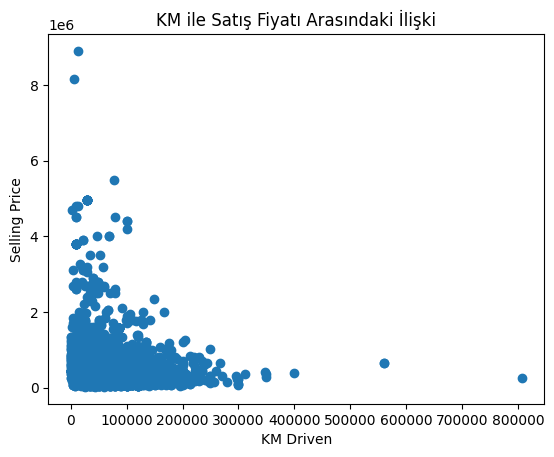

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['km_driven'], df['selling_price'])
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.title("KM ile Satış Fiyatı Arasındaki İlişki")
plt.show()


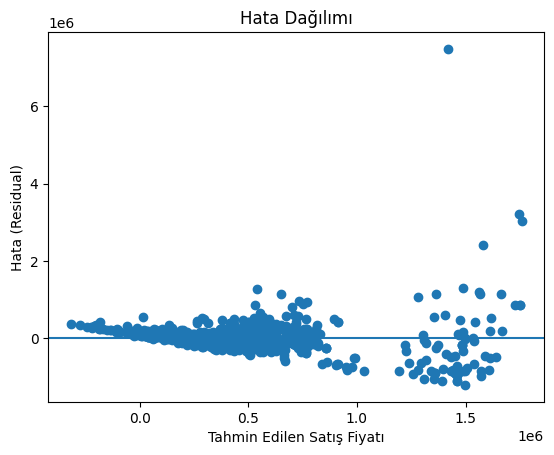

In [7]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Tahmin Edilen Satış Fiyatı")
plt.ylabel("Hata (Residual)")
plt.title("Hata Dağılımı")
plt.show()
